In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data
from matplotlib import cm
from math import log10

In [35]:
Base = pd.read_csv('C:/Users/maria/Downloads/Conteo_de_Procesos (1).csv', 
                 sep = ',', parse_dates= True,
                        thousands=',', decimal='.' )
Base.head()

,HECHO,RUPTURA,CONEXO,ESTADO_NOTICIA,ETAPA,ANIO_DENUNCIA,ANIO_ENTRADA,ANIO_HECHO,LEY,PAIS,...,SECCIONAL,GRUPO_DELITO,DELITO,CAPTURA,IMPUTACION,CONDENA,ATIPICIDAD_INEXISTENCIA,ACUSACION,HOMICIDIO_DOLOSO_CONSUMADO,TOTAL_PROCESOS
0,SI,NO,NO,ACTIVO,INDAGACIÓN,2017,2017,2016,Ley 906,Colombia,...,DIRECCIÓN SECCIONAL DE CUNDINAMARCA,FALSEDAD EN DOCUMENTO,FALSEDAD IDEOLOGICA EN DOCUMENTO PUBLICO. ART....,NO,NO,NO,NO,NO,NO,1
1,SI,NO,NO,ACTIVO,INDAGACIÓN,2020,2020,2020,Ley 906,Colombia,...,DIRECCIÓN SECCIONAL DE BOGOTÁ,HURTO,HURTO. ART. 239 C.P. AGRAVADO CUANDO LO HURTAD...,NO,NO,NO,NO,NO,NO,891
2,SI,NO,NO,ACTIVO,JUICIO,2020,2020,2020,Ley 906,Colombia,...,DIRECCIÓN SECCIONAL DE BOGOTÁ,HURTO,HURTO CALIFICADO MENOR CUANTIA ART. 240 C.P. ...,NO,SI,NO,NO,NO,NO,284
3,SI,NO,NO,INACTIVO,EJECUCIÓN DE PENAS,2017,2017,2017,Ley 906,Colombia,...,DIRECCION ESPECIALIZADA CONTRA ORGANIZACIONES ...,ESTUPEFACIENTES,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES...,SI,SI,SI,NO,SI,NO,1
4,SI,NO,NO,INACTIVO,INDAGACIÓN,2011,2011,2011,Ley 1098,Colombia,...,DIRECCIÓN SECCIONAL DE MEDELLÍN,SEGURIDAD PUBLICA,OBSTRUCCION A VIAS PUBLICAS QUE AFECTAN EL ORD...,NO,NO,NO,NO,NO,NO,1


Datos extraídos de la fuente 'Conteo de Procesos'

Fecha creación: 25 de abril de 2019

Datos actualizados por última vez: 2 de febrero de 2021

Fuente: [Datos Abiertos](https://www.datos.gov.co/resource/q6re-36rh.json) 

La base utilizada trata sobre el total de noticias criminales por delito registrados en el Sistema Penal Oral Acusatorio en la Ley 906 de 2004 y Ley 1098 de 2006 desde hechos ocurridos en 2010. Cuenta con 2'062.269 filas y 22 columnas, el departamento donde se recogieron los datos fue Bogotá D.C, tienen una frecuencia mensual y son del Sector de Justicia y Derecho. 

In [71]:
Base.head(-100)

,HECHO,RUPTURA,CONEXO,ESTADO_NOTICIA,ETAPA,ANIO_DENUNCIA,ANIO_ENTRADA,ANIO_HECHO,LEY,PAIS,...,SECCIONAL,GRUPO_DELITO,DELITO,CAPTURA,IMPUTACION,CONDENA,ATIPICIDAD_INEXISTENCIA,ACUSACION,HOMICIDIO_DOLOSO_CONSUMADO,TOTAL_PROCESOS
0,SI,NO,NO,ACTIVO,INDAGACIÓN,2017,2017,2016,Ley 906,Colombia,...,DIRECCIÓN SECCIONAL DE CUNDINAMARCA,FALSEDAD EN DOCUMENTO,FALSEDAD IDEOLOGICA EN DOCUMENTO PUBLICO. ART....,NO,NO,NO,NO,NO,NO,1
1,SI,NO,NO,ACTIVO,INDAGACIÓN,2020,2020,2020,Ley 906,Colombia,...,DIRECCIÓN SECCIONAL DE BOGOTÁ,HURTO,HURTO. ART. 239 C.P. AGRAVADO CUANDO LO HURTAD...,NO,NO,NO,NO,NO,NO,891
2,SI,NO,NO,ACTIVO,JUICIO,2020,2020,2020,Ley 906,Colombia,...,DIRECCIÓN SECCIONAL DE BOGOTÁ,HURTO,HURTO CALIFICADO MENOR CUANTIA ART. 240 C.P. ...,NO,SI,NO,NO,NO,NO,284
3,SI,NO,NO,INACTIVO,EJECUCIÓN DE PENAS,2017,2017,2017,Ley 906,Colombia,...,DIRECCION ESPECIALIZADA CONTRA ORGANIZACIONES ...,ESTUPEFACIENTES,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES...,SI,SI,SI,NO,SI,NO,1
4,SI,NO,NO,INACTIVO,INDAGACIÓN,2011,2011,2011,Ley 1098,Colombia,...,DIRECCIÓN SECCIONAL DE MEDELLÍN,SEGURIDAD PUBLICA,OBSTRUCCION A VIAS PUBLICAS QUE AFECTAN EL ORD...,NO,NO,NO,NO,NO,NO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062264,NO,NO,NO,INACTIVO,INDAGACIÓN,2013,2013,2013,Ley 906,Colombia,...,DIRECCIÓN SECCIONAL DE GUAVIARE,VIDA E INTEGRIDAD PERSONAL,DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL,NO,NO,NO,SI,NO,NO,1
2062265,SI,NO,NO,ACTIVO,QUERELLABLE,2017,2017,2017,Ley 906,Colombia,...,DIRECCIÓN SECCIONAL DE TOLIMA,LESIONES PERSONALES CULPOSAS,LESIONES CULPOSAS ART. 120 C.P. INCISO 1,NO,NO,NO,NO,NO,NO,1
2062266,SI,NO,NO,ACTIVO,INDAGACIÓN,2020,2020,2020,Ley 906,Colombia,...,DIRECCIÓN SECCIONAL DE VALLE DEL CAUCA,HURTO,HURTO CALIFICADO ART. 240 C.P. AGRAVADO CUAND...,NO,NO,NO,NO,NO,NO,1
2062267,SI,NO,NO,ACTIVO,INDAGACIÓN,2020,2020,2020,Ley 906,Colombia,...,DIRECCIÓN SECCIONAL DE MAGDALENA MEDIO,ADMINISTRACION PUBLICA,ABUSO DE AUTORIDAD POR ACTO ARBITRARIO O INJUS...,NO,NO,NO,NO,NO,NO,1


In [37]:
print('Base')
print('Filas: ', Base.shape[0])
print('Columnas: ', Base.shape[1])

Base
Filas:  2062369
Columnas:  22


Acontinuación se mostraran los atributos y tipos de atributo.

In [38]:
Base.dtypes

HECHO                         object
RUPTURA                       object
CONEXO                        object
ESTADO_NOTICIA                object
ETAPA                         object
ANIO_DENUNCIA                  int64
ANIO_ENTRADA                   int64
ANIO_HECHO                     int64
LEY                           object
PAIS                          object
DEPARTAMENTO                  object
MUNICIPIO                     object
SECCIONAL                     object
GRUPO_DELITO                  object
DELITO                        object
CAPTURA                       object
IMPUTACION                    object
CONDENA                       object
ATIPICIDAD_INEXISTENCIA       object
ACUSACION                     object
HOMICIDIO_DOLOSO_CONSUMADO    object
TOTAL_PROCESOS                 int64
dtype: object

## Completitud

Para la limpieza de datos lo primero que se hizo fue saber donde habian datos nulos o faltantes y cual era el porcentaje de estos.

In [39]:
#Saber donde hay nulos
Base.isnull()

,HECHO,RUPTURA,CONEXO,ESTADO_NOTICIA,ETAPA,ANIO_DENUNCIA,ANIO_ENTRADA,ANIO_HECHO,LEY,PAIS,...,SECCIONAL,GRUPO_DELITO,DELITO,CAPTURA,IMPUTACION,CONDENA,ATIPICIDAD_INEXISTENCIA,ACUSACION,HOMICIDIO_DOLOSO_CONSUMADO,TOTAL_PROCESOS
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062364,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2062365,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2062366,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2062367,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
for col in Base.columns:
    num_missing = Base[col].isnull().sum()
    pct_missing = np.mean(Base[col].isnull())
    #print(col," - ",round(pct_missing*100, 2),"% - ",num_missing)
    print('{} - {}% - {}'.format(col,round(pct_missing*100, 7),num_missing))

HECHO - 0.0% - 0
RUPTURA - 0.0% - 0
CONEXO - 0.0% - 0
ESTADO_NOTICIA - 4.85e-05% - 1
ETAPA - 0.001988% - 41
ANIO_DENUNCIA - 0.0% - 0
ANIO_ENTRADA - 0.0% - 0
ANIO_HECHO - 0.0% - 0
LEY - 0.0% - 0
PAIS - 0.0008728% - 18
DEPARTAMENTO - 0.0008728% - 18
MUNICIPIO - 0.0008728% - 18
SECCIONAL - 0.7231005% - 14913
GRUPO_DELITO - 0.0% - 0
DELITO - 0.0% - 0
CAPTURA - 0.0% - 0
IMPUTACION - 0.0% - 0
CONDENA - 0.0% - 0
ATIPICIDAD_INEXISTENCIA - 0.0% - 0
ACUSACION - 0.0% - 0
HOMICIDIO_DOLOSO_CONSUMADO - 0.0% - 0
TOTAL_PROCESOS - 0.0% - 0


Como se evidencia las variable Seccional es la que más contiene datos perdidos. A continuación se hara una visualización de esos datos perdidos 

In [41]:
Base[Base["ESTADO_NOTICIA"].isnull() == True]

,HECHO,RUPTURA,CONEXO,ESTADO_NOTICIA,ETAPA,ANIO_DENUNCIA,ANIO_ENTRADA,ANIO_HECHO,LEY,PAIS,...,SECCIONAL,GRUPO_DELITO,DELITO,CAPTURA,IMPUTACION,CONDENA,ATIPICIDAD_INEXISTENCIA,ACUSACION,HOMICIDIO_DOLOSO_CONSUMADO,TOTAL_PROCESOS
949355,SI,NO,NO,NaN,INDAGACIÓN,2020,2020,2020,Ley 906,Colombia,...,DIRECCIÓN SECCIONAL DE BOGOTÁ,FALSEDAD EN DOCUMENTO,FALSEDAD EN DOCUMENTO PRIVADO. ART. 289 C.P.,NO,NO,NO,NO,NO,NO,1


+  *ESTADO_NOTICIA:*  
Se evidencia que el dato 949355 es el faltante para la variable estado de notici.

In [42]:
Base[Base["ETAPA"].isnull() == True]

,HECHO,RUPTURA,CONEXO,ESTADO_NOTICIA,ETAPA,ANIO_DENUNCIA,ANIO_ENTRADA,ANIO_HECHO,LEY,PAIS,...,SECCIONAL,GRUPO_DELITO,DELITO,CAPTURA,IMPUTACION,CONDENA,ATIPICIDAD_INEXISTENCIA,ACUSACION,HOMICIDIO_DOLOSO_CONSUMADO,TOTAL_PROCESOS
84424,SI,NO,NO,INACTIVO,NaN,2010,2010,2010,Ley 906,Colombia,...,DIRECCIÓN SECCIONAL DE SANTANDER,"FABRICACION, TRAFICO Y PORTE DE ARMAS","FABRICACION, TRAFICO Y PORTE DE ARMAS DE FUEGO...",SI,SI,NO,NO,SI,NO,1
102455,SI,NO,NO,INACTIVO,NaN,2011,2011,2011,Ley 906,Colombia,...,DIRECCIÓN SECCIONAL DE CALDAS,PATRIMONIO ECONOMICO,PERTURBACION DE LA POSESION SOBRE INMUEBLE. AR...,NO,SI,NO,NO,NO,NO,1
127536,NO,SI,NO,ACTIVO,NaN,2012,2012,2012,Ley 906,Colombia,...,DIRECCIÓN SECCIONAL DE BOGOTÁ,"FABRICACION, TRAFICO Y PORTE DE ARMAS","FABRICACION, TRAFICO Y PORTE DE ARMAS DE FUEGO...",SI,SI,NO,NO,SI,NO,1
200711,SI,NO,NO,INACTIVO,NaN,2013,2013,2013,Ley 906,Colombia,...,DIRECCIÓN SECCIONAL DE CUNDINAMARCA,ESTUPEFACIENTES,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES...,SI,SI,NO,NO,NO,NO,1
205953,SI,NO,NO,INACTIVO,NaN,2013,2013,2013,Ley 906,Colombia,...,DIRECCIÓN SECCIONAL DE CHOCÓ,ESTUPEFACIENTES,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES...,NO,SI,NO,NO,NO,NO,1
245402,NO,SI,NO,ACTIVO,NaN,2012,2013,2012,Ley 906,Colombia,...,DIRECCION ESPECIALIZADA CONTRA ORGANIZACIONES ...,ESTUPEFACIENTES,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES...,SI,SI,SI,NO,NO,NO,1
310647,SI,NO,NO,INACTIVO,NaN,2012,2012,2012,Ley 906,Colombia,...,DIRECCIÓN SECCIONAL DE CALDAS,PATRIMONIO ECONOMICO,USURPACION DE TIERRAS. ART. 261 C.P.,NO,SI,NO,NO,SI,NO,1
334230,SI,NO,NO,INACTIVO,NaN,2013,2013,2013,Ley 906,Colombia,...,DIRECCIÓN SECCIONAL DE BOYACÁ,HURTO,HURTO. ART. 239 C.P.,SI,SI,NO,NO,NO,NO,1
384481,SI,NO,NO,INACTIVO,NaN,2014,2014,2014,Ley 906,Colombia,...,DIRECCIÓN SECCIONAL DE CALDAS,HURTO,HURTO. ART. 239 C.P.,NO,SI,NO,NO,SI,NO,1
391821,SI,NO,NO,INACTIVO,NaN,2010,2010,2010,Ley 906,Colombia,...,DIRECCIÓN SECCIONAL DE SANTANDER,HURTO,HURTO CALIFICADO ART. 240 C.P. AGRAVADO POR E...,SI,SI,NO,NO,SI,NO,1


+  *ETAPA:*  
En la variable etapa evidenciaron  41  datos faltantes

In [43]:
Base[Base["DEPARTAMENTO"].isnull() == True]

,HECHO,RUPTURA,CONEXO,ESTADO_NOTICIA,ETAPA,ANIO_DENUNCIA,ANIO_ENTRADA,ANIO_HECHO,LEY,PAIS,...,SECCIONAL,GRUPO_DELITO,DELITO,CAPTURA,IMPUTACION,CONDENA,ATIPICIDAD_INEXISTENCIA,ACUSACION,HOMICIDIO_DOLOSO_CONSUMADO,TOTAL_PROCESOS
81530,NO,NO,NO,INACTIVO,QUERELLABLE,2018,2018,2018,Ley 906,NaN,...,DIRECCIÓN SECCIONAL DE BOGOTÁ,INJURIA Y CALUMNIA,CALUMNIA. ART. 221 C.P.,NO,NO,NO,SI,NO,NO,3
130777,NO,NO,NO,INACTIVO,QUERELLABLE,2018,2018,2018,Ley 906,NaN,...,DIRECCIÓN SECCIONAL DE BOGOTÁ,INJURIA Y CALUMNIA,INJURIA. ART. 220 C.P.,NO,NO,NO,SI,NO,NO,2
225343,SI,NO,NO,INACTIVO,QUERELLABLE,2018,2018,2017,Ley 906,NaN,...,DIRECCIÓN SECCIONAL DE BOGOTÁ,FE PUBLICA,FALSEDAD PERSONAL. ART. 296 C.P.,NO,NO,NO,NO,NO,NO,1
248350,NO,NO,NO,INACTIVO,INDAGACIÓN,2018,2018,2017,Ley 906,NaN,...,DIRECCIÓN SECCIONAL DE BOGOTÁ,AMENAZAS,AMENAZAS ART. 347 C.P.,NO,NO,NO,SI,NO,NO,1
465343,NO,NO,NO,INACTIVO,INDAGACIÓN,2018,2018,2018,Ley 906,NaN,...,DIRECCIÓN SECCIONAL DE BOGOTÁ,ESTAFA,ESTAFA. ART. 246 C.P. AGRAVADA CUANDO LA CONDU...,NO,NO,NO,SI,NO,NO,1
751188,SI,NO,NO,INACTIVO,QUERELLABLE,2018,2018,2018,Ley 906,NaN,...,DIRECCIÓN SECCIONAL DE BOGOTÁ,INJURIA Y CALUMNIA,CALUMNIA. ART. 221 C.P.,NO,NO,NO,NO,NO,NO,3
835801,NO,NO,NO,INACTIVO,QUERELLABLE,2018,2018,2018,Ley 906,NaN,...,DIRECCIÓN SECCIONAL DE BOGOTÁ,INJURIA Y CALUMNIA,DE LA INJURIA Y LA CALUMNIA,NO,NO,NO,SI,NO,NO,1
998966,NO,NO,NO,INACTIVO,INDAGACIÓN,2018,2018,2018,Ley 906,NaN,...,DIRECCIÓN SECCIONAL DE BOGOTÁ,CONTRA LA FAMILIA,INASISTENCIA ALIMENTARIA ART. 233 C.P.,NO,NO,NO,SI,NO,NO,1
1031335,NO,NO,NO,INACTIVO,INDAGACIÓN,2018,2018,2018,Ley 906,NaN,...,DIRECCIÓN SECCIONAL DE BOGOTÁ,CONSTRENIMIENTO,CONSTREÑIMIENTO ILEGAL ART. 182 C.P.,NO,NO,NO,SI,NO,NO,4
1084526,SI,NO,NO,ACTIVO,INDAGACIÓN,2018,2018,2018,Ley 906,NaN,...,DIRECCIÓN SECCIONAL DE BOGOTÁ,DELITOS INFORMATICOS,ACCESO ABUSIVO A UN SISTEMA INFORMATICO ART 26...,NO,NO,NO,NO,NO,NO,1


+  *DEPARTAMENTO:*  
Para la variable departamento se evidenciaron  18  datos  faltantes las cuales coindicen con las filas de las variables departamento, pais y municipio.

In [44]:
Base[Base["SECCIONAL"].isnull() == True]

,HECHO,RUPTURA,CONEXO,ESTADO_NOTICIA,ETAPA,ANIO_DENUNCIA,ANIO_ENTRADA,ANIO_HECHO,LEY,PAIS,...,SECCIONAL,GRUPO_DELITO,DELITO,CAPTURA,IMPUTACION,CONDENA,ATIPICIDAD_INEXISTENCIA,ACUSACION,HOMICIDIO_DOLOSO_CONSUMADO,TOTAL_PROCESOS
100,SI,NO,NO,INACTIVO,QUERELLABLE,2010,2010,2010,Ley 906,Colombia,...,NaN,INJURIA Y CALUMNIA,DE LA INJURIA Y LA CALUMNIA,NO,NO,NO,NO,NO,NO,1
732,SI,NO,NO,INACTIVO,INDAGACIÓN,2012,2012,2012,Ley 906,Colombia,...,NaN,HURTO,HURTO. ART. 239 C.P.,NO,NO,NO,NO,NO,NO,1
1200,SI,NO,NO,INACTIVO,INDAGACIÓN,2017,2017,2016,Ley 906,Colombia,...,NaN,HURTO,HURTO. ART. 239 C.P.,NO,NO,NO,NO,NO,NO,4
1308,SI,NO,NO,INACTIVO,INDAGACIÓN,2012,2012,2012,Ley 906,Colombia,...,NaN,ESTUPEFACIENTES,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES...,SI,NO,NO,NO,NO,NO,1
1309,SI,NO,NO,INACTIVO,INDAGACIÓN,2013,2013,2013,Ley 906,Colombia,...,NaN,HOMICIDIO DOLOSO,HOMICIDIO ART. 103 C.P.,NO,NO,NO,NO,NO,SI,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061571,NO,NO,NO,INACTIVO,QUERELLABLE,2010,2010,2010,Ley 906,Colombia,...,NaN,ESTAFA,ESTAFA. ART. 246 C.P. MENOR CUANTIA,NO,NO,NO,SI,NO,NO,1
2061972,SI,NO,NO,INACTIVO,INDAGACIÓN,2012,2012,2011,Ley 906,Colombia,...,NaN,DELITOS INFORMATICOS,HURTO POR MEDIOS INFORMATICOS Y SEMEJANTES ART...,NO,NO,NO,NO,NO,NO,1
2062143,SI,NO,NO,INACTIVO,QUERELLABLE,2011,2011,2011,Ley 906,Colombia,...,NaN,HOMICIDIO DOLOSO,HOMICIDIO ART. 103 C.P.,NO,NO,NO,NO,NO,NO,1
2062149,SI,NO,NO,INACTIVO,INDAGACIÓN,2014,2014,2014,Ley 906,Colombia,...,NaN,FALSEDAD EN DOCUMENTO,FALSEDAD MATERIAL EN DOCUMENTO PUBLICO. ART. 2...,NO,NO,NO,NO,NO,NO,1


+  *SECCIONAL:*  
La variable seccional tiene el 14913 datos perdidos, lo cual corresponde al 0.72% de la muestra y es la que más contiene. 

### Seleccionar columnas que se usarán para el análisis

Se seleccionaron las siguientes variables, las cuales se utilizaran en el análisis. Pero basados en los porcentajes de faltantes lo primero que se hara sera borrar los registros ya que la cantida de datos que se elimina no es significativa y si se imputan se podría sesgar la base, la variable ATIPICIDAD_INEXISTENCIA no fue utilizada puesto que conceptualmente no es muy entendible su interpretacion.

In [45]:
columns = ['HECHO',
          'RUPTURA',
          'CONEXO',
          'ESTADO_NOTICIA',
          'ETAPA',
          'ANIO_DENUNCIA',
           'ANIO_ENTRADA',
           'ANIO_HECHO',
           'LEY',
           'PAIS',
           'DEPARTAMENTO',
           'MUNICIPIO',
           'SECCIONAL',
           'GRUPO_DELITO',
           'DELITO',
           'CAPTURA',
           'IMPUTACION',
           'CONDENA',
           'ACUSACION',
           'HOMICIDIO_DOLOSO_CONSUMADO',
           'TOTAL_PROCESOS']
Base1 = Base.copy()
Base1 = Base[columns]
Base1

,HECHO,RUPTURA,CONEXO,ESTADO_NOTICIA,ETAPA,ANIO_DENUNCIA,ANIO_ENTRADA,ANIO_HECHO,LEY,PAIS,...,MUNICIPIO,SECCIONAL,GRUPO_DELITO,DELITO,CAPTURA,IMPUTACION,CONDENA,ACUSACION,HOMICIDIO_DOLOSO_CONSUMADO,TOTAL_PROCESOS
0,SI,NO,NO,ACTIVO,INDAGACIÓN,2017,2017,2016,Ley 906,Colombia,...,FACATATIVÁ,DIRECCIÓN SECCIONAL DE CUNDINAMARCA,FALSEDAD EN DOCUMENTO,FALSEDAD IDEOLOGICA EN DOCUMENTO PUBLICO. ART....,NO,NO,NO,NO,NO,1
1,SI,NO,NO,ACTIVO,INDAGACIÓN,2020,2020,2020,Ley 906,Colombia,...,"BOGOTÁ, D.C.",DIRECCIÓN SECCIONAL DE BOGOTÁ,HURTO,HURTO. ART. 239 C.P. AGRAVADO CUANDO LO HURTAD...,NO,NO,NO,NO,NO,891
2,SI,NO,NO,ACTIVO,JUICIO,2020,2020,2020,Ley 906,Colombia,...,"BOGOTÁ, D.C.",DIRECCIÓN SECCIONAL DE BOGOTÁ,HURTO,HURTO CALIFICADO MENOR CUANTIA ART. 240 C.P. ...,NO,SI,NO,NO,NO,284
3,SI,NO,NO,INACTIVO,EJECUCIÓN DE PENAS,2017,2017,2017,Ley 906,Colombia,...,LA PLATA,DIRECCION ESPECIALIZADA CONTRA ORGANIZACIONES ...,ESTUPEFACIENTES,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES...,SI,SI,SI,SI,NO,1
4,SI,NO,NO,INACTIVO,INDAGACIÓN,2011,2011,2011,Ley 1098,Colombia,...,MEDELLÍN,DIRECCIÓN SECCIONAL DE MEDELLÍN,SEGURIDAD PUBLICA,OBSTRUCCION A VIAS PUBLICAS QUE AFECTAN EL ORD...,NO,NO,NO,NO,NO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062364,SI,NO,NO,INACTIVO,QUERELLABLE,2012,2012,2011,Ley 906,Colombia,...,BARBACOAS,DIRECCIÓN SECCIONAL DE NARIÑO,LESIONES PERSONALES,LESIONES PERSONALES CON INCAPACIDAD MENOR 60 DIAS,NO,NO,NO,NO,NO,1
2062365,SI,NO,NO,INACTIVO,INDAGACIÓN,2018,2018,2018,Ley 1098,Colombia,...,"BOGOTÁ, D.C.",DIRECCIÓN SECCIONAL DE BOGOTÁ,HURTO,HURTO CALIFICADO ART. 240 C.P. AGRAVADO POR LA...,NO,NO,NO,NO,NO,1
2062366,SI,NO,NO,INACTIVO,QUERELLABLE,2015,2015,2015,Ley 906,Colombia,...,ABREGO,DIRECCIÓN SECCIONAL DE NORTE DE SANTANDER,LESIONES PERSONALES,LESIONES PERSONALES CON INCAPACIDAD MENOR 60 DIAS,NO,NO,NO,NO,NO,1
2062367,SI,NO,NO,ACTIVO,INDAGACIÓN,2020,2020,2020,Ley 906,Colombia,...,PUEBLOVIEJO,DIRECCIÓN SECCIONAL DE MAGDALENA,CONCIERTO PARA DELINQUIR,CONCIERTO PARA DELINQUIR ART. 340 C.P.,NO,NO,NO,NO,NO,1


In [46]:
print('Antes de borrar registros: ',Base1.shape)
for col in Base1.columns:
    missing = Base1[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        Base1['{}_ismissing'.format(col)] = missing
ismissing_cols = [col for col in Base1.columns if 'ismissing' in col]
Base1['num_missing'] = Base1[ismissing_cols].sum(axis=1)

Antes de borrar registros:  (2062369, 21)
created missing indicator for: ESTADO_NOTICIA
created missing indicator for: ETAPA
created missing indicator for: PAIS
created missing indicator for: DEPARTAMENTO
created missing indicator for: MUNICIPIO
created missing indicator for: SECCIONAL


In [47]:
Base1[Base1.num_missing >= 1]

,HECHO,RUPTURA,CONEXO,ESTADO_NOTICIA,ETAPA,ANIO_DENUNCIA,ANIO_ENTRADA,ANIO_HECHO,LEY,PAIS,...,ACUSACION,HOMICIDIO_DOLOSO_CONSUMADO,TOTAL_PROCESOS,ESTADO_NOTICIA_ismissing,ETAPA_ismissing,PAIS_ismissing,DEPARTAMENTO_ismissing,MUNICIPIO_ismissing,SECCIONAL_ismissing,num_missing
100,SI,NO,NO,INACTIVO,QUERELLABLE,2010,2010,2010,Ley 906,Colombia,...,NO,NO,1,False,False,False,False,False,True,1
732,SI,NO,NO,INACTIVO,INDAGACIÓN,2012,2012,2012,Ley 906,Colombia,...,NO,NO,1,False,False,False,False,False,True,1
1200,SI,NO,NO,INACTIVO,INDAGACIÓN,2017,2017,2016,Ley 906,Colombia,...,NO,NO,4,False,False,False,False,False,True,1
1308,SI,NO,NO,INACTIVO,INDAGACIÓN,2012,2012,2012,Ley 906,Colombia,...,NO,NO,1,False,False,False,False,False,True,1
1309,SI,NO,NO,INACTIVO,INDAGACIÓN,2013,2013,2013,Ley 906,Colombia,...,NO,SI,1,False,False,False,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061571,NO,NO,NO,INACTIVO,QUERELLABLE,2010,2010,2010,Ley 906,Colombia,...,NO,NO,1,False,False,False,False,False,True,1
2061972,SI,NO,NO,INACTIVO,INDAGACIÓN,2012,2012,2011,Ley 906,Colombia,...,NO,NO,1,False,False,False,False,False,True,1
2062143,SI,NO,NO,INACTIVO,QUERELLABLE,2011,2011,2011,Ley 906,Colombia,...,NO,NO,1,False,False,False,False,False,True,1
2062149,SI,NO,NO,INACTIVO,INDAGACIÓN,2014,2014,2014,Ley 906,Colombia,...,NO,NO,1,False,False,False,False,False,True,1


In [48]:
ind_missing = Base1[Base1['num_missing'] >= 1].index
df_less_missing_rows = Base1.drop(ind_missing, axis=0)
df_less_missing_rows = df_less_missing_rows[columns]
print('Después de borrar registros: ',df_less_missing_rows.shape)

Después de borrar registros:  (2047396, 21)


In [49]:
for col in Base1.columns:
    num_missing = Base1[col].isnull().sum()  
    pct_missing = np.mean(Base1[col].isnull())
    #print(col," - ",round(pct_missing*100, 2),"% - ",num_missing)
    print('{} - {}% - {}'.format(col,round(pct_missing*100, 2),num_missing))

HECHO - 0.0% - 0
RUPTURA - 0.0% - 0
CONEXO - 0.0% - 0
ESTADO_NOTICIA - 0.0% - 1
ETAPA - 0.0% - 41
ANIO_DENUNCIA - 0.0% - 0
ANIO_ENTRADA - 0.0% - 0
ANIO_HECHO - 0.0% - 0
LEY - 0.0% - 0
PAIS - 0.0% - 18
DEPARTAMENTO - 0.0% - 18
MUNICIPIO - 0.0% - 18
SECCIONAL - 0.72% - 14913
GRUPO_DELITO - 0.0% - 0
DELITO - 0.0% - 0
CAPTURA - 0.0% - 0
IMPUTACION - 0.0% - 0
CONDENA - 0.0% - 0
ACUSACION - 0.0% - 0
HOMICIDIO_DOLOSO_CONSUMADO - 0.0% - 0
TOTAL_PROCESOS - 0.0% - 0
ESTADO_NOTICIA_ismissing - 0.0% - 0
ETAPA_ismissing - 0.0% - 0
PAIS_ismissing - 0.0% - 0
DEPARTAMENTO_ismissing - 0.0% - 0
MUNICIPIO_ismissing - 0.0% - 0
SECCIONAL_ismissing - 0.0% - 0
num_missing - 0.0% - 0


Al borrar los registros faltantes se observa que no hay ningun dato perdido y la base quedo con un total de 2'047.396 filas y 21 columnas. Pero, se verificará que dentro de esta nueva base no haya datos duplicados.

## Coherencia

DUPLICADOS 

In [50]:
Base1 = df_less_missing_rows
Base1[Base1.duplicated()]

,HECHO,RUPTURA,CONEXO,ESTADO_NOTICIA,ETAPA,ANIO_DENUNCIA,ANIO_ENTRADA,ANIO_HECHO,LEY,PAIS,...,MUNICIPIO,SECCIONAL,GRUPO_DELITO,DELITO,CAPTURA,IMPUTACION,CONDENA,ACUSACION,HOMICIDIO_DOLOSO_CONSUMADO,TOTAL_PROCESOS
119255,NO,SI,NO,INACTIVO,INVESTIGACIÓN,2014,2017,2014,Ley 906,Colombia,...,SOACHA,DIRECCIÓN SECCIONAL DE CUNDINAMARCA,ESTUPEFACIENTES,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES...,NO,NO,NO,NO,NO,1
190456,NO,SI,NO,INACTIVO,JUICIO,2015,2016,2015,Ley 906,Colombia,...,BUCARAMANGA,DIRECCIÓN SECCIONAL DE SANTANDER,HURTO,HURTO AGRAVADO ART. 239 C.P. MENOR CUANTIA,SI,SI,NO,SI,NO,1
209363,NO,SI,NO,INACTIVO,INVESTIGACIÓN,2016,2016,2016,Ley 906,Colombia,...,CALOTO,DIRECCIÓN SECCIONAL DE CAUCA,ESTUPEFACIENTES,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES...,SI,SI,NO,NO,NO,1
237980,NO,SI,NO,INACTIVO,INVESTIGACIÓN,2018,2019,2018,Ley 906,Colombia,...,SANTA MARTA,DIRECCIÓN SECCIONAL DE MAGDALENA,"FABRICACION, TRAFICO Y PORTE DE ARMAS","FABRICACION, TRAFICO Y PORTE DE ARMAS DE FUEGO...",NO,NO,NO,NO,NO,1
276155,NO,SI,NO,INACTIVO,JUICIO,2011,2011,2011,Ley 906,Colombia,...,BUCARAMANGA,DIRECCIÓN SECCIONAL DE SANTANDER,ESTUPEFACIENTES,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES...,SI,SI,NO,SI,NO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035708,NO,SI,NO,INACTIVO,INDAGACIÓN,2020,2020,2020,Ley 1098,Colombia,...,"BOGOTÁ, D.C.",DIRECCIÓN SECCIONAL DE BOGOTÁ,ESTUPEFACIENTES,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES...,NO,NO,NO,NO,NO,1
2036508,NO,SI,NO,INACTIVO,INVESTIGACIÓN,2015,2015,2015,Ley 906,Colombia,...,SANTANDER DE QUILICHAO,DIRECCIÓN SECCIONAL DE CAUCA,ESTUPEFACIENTES,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES...,SI,NO,NO,NO,NO,1
2036630,NO,SI,NO,INACTIVO,JUICIO,2015,2016,2015,Ley 906,Colombia,...,BUCARAMANGA,DIRECCIÓN SECCIONAL DE SANTANDER,ESTUPEFACIENTES,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES...,SI,SI,NO,SI,NO,1
2040955,NO,SI,NO,INACTIVO,INVESTIGACIÓN,2013,2013,2013,Ley 906,Colombia,...,CALI,DIRECCIÓN SECCIONAL DE CALI,LESIONES PERSONALES,LESIONES ART. 111 C.P.,NO,NO,NO,NO,NO,1


In [51]:
Base1 = Base1.drop_duplicates()
print(Base1.shape)
print(Base1.shape)

(2047135, 21)
(2047135, 21)


Como se puede evidenciar si existían datos duplicados por lo cual se quitaron y se dejó la base limpia para trabajar.        La base tiene un problema con los años por lo cual hay que hacerle una transformación y verificar su consistencia lo cual consiste en cambiar el formato de la variable. 

### Consistencia 

In [52]:
Base1.dtypes

HECHO                         object
RUPTURA                       object
CONEXO                        object
ESTADO_NOTICIA                object
ETAPA                         object
ANIO_DENUNCIA                  int64
ANIO_ENTRADA                   int64
ANIO_HECHO                     int64
LEY                           object
PAIS                          object
DEPARTAMENTO                  object
MUNICIPIO                     object
SECCIONAL                     object
GRUPO_DELITO                  object
DELITO                        object
CAPTURA                       object
IMPUTACION                    object
CONDENA                       object
ACUSACION                     object
HOMICIDIO_DOLOSO_CONSUMADO    object
TOTAL_PROCESOS                 int64
dtype: object

#### Consistencia datos categóricos 

In [53]:
Base1['ANIO_DENUNCIA'].value_counts()

2018    222598
2017    218237
2019    211128
2016    202303
2015    194245
2014    185052
2013    179348
2012    169522
2020    161357
2011    155627
2010    119339
2021     28375
2005         4
Name: ANIO_DENUNCIA, dtype: int64

In [54]:
Base1['ANIO_ENTRADA'].value_counts()

2018    226160
2019    221026
2017    219558
2016    200867
2015    191409
2014    180607
2013    174002
2020    172864
2012    162029
2011    151736
2010    117249
2021     29622
2005         4
2009         2
Name: ANIO_ENTRADA, dtype: int64

In [55]:
Base1['ANIO_HECHO'].value_counts()

2017    207571
2018    204969
2016    197718
2015    194328
2014    189609
2013    186180
2012    184773
2019    182546
2011    182123
2010    169245
2020    131130
2021     16939
2055         3
2205         1
Name: ANIO_HECHO, dtype: int64

Como se puede observar para la varaible año de hecho exiten dos años que aun no han pasado por lo cual se infiere que son errores de digitación.

In [56]:
Base1['ETAPA'].value_counts()

INDAGACIÓN                           1189954
QUERELLABLE                           341403
EJECUCIÓN DE PENAS                    226400
JUICIO                                197500
INVESTIGACIÓN                          82294
TERMINACIÓN ANTICIPADA                  8169
ETAPA DE INVESTIGACION PRELIMINAR       1243
ETAPA DE INSTRUCCION                     172
Name: ETAPA, dtype: int64

In [57]:
Base1['PAIS'].value_counts()

Colombia    2047135
Name: PAIS, dtype: int64

In [58]:
Base1['LEY'].value_counts()

Ley 906                 1929026
Ley 1098                 114414
Jurisdicción Menores       2280
LEY 600                    1415
Name: LEY, dtype: int64

Visualmente el año de entrada y el año de denuncia son el mismo por lo cual se hará una resta para saber cuales son los diferentes, y así eliminarlos. 

In [30]:
Desfase_A = Base1['ANIO_ENTRADA']- Base1['ANIO_DENUNCIA']

In [30]:
Desfase_A.value_counts()

0 days        1970174
365 days        23188
730 days        11822
731 days         9304
1096 days        8159
366 days         6868
1461 days        6201
1095 days        3289
1826 days        2997
2191 days        1270
2557 days         863
2192 days         848
1827 days         767
2922 days         682
3287 days         323
2556 days         244
3652 days          75
-365 days          25
3288 days          19
4018 days           8
3653 days           5
-730 days           2
-1461 days          1
-1095 days          1
dtype: int64

En este caso observamos que hay varios casos con muchos dias de diferencia.

#### Consistencia datos ordenados cuantitativos

In [59]:
pd.options.display.float_format = "{:.2f}".format

In [60]:
Base1['TOTAL_PROCESOS'].describe()

count   2047135.00
mean          6.37
std         155.37
min           1.00
25%           1.00
50%           1.00
75%           2.00
max      116668.00
Name: TOTAL_PROCESOS, dtype: float64

Con estas transformaciones echas la base de datos esta lista para trabajar en las visualizaciones.

## Framework de las visualizaciones 

Para  el primer modismo se seleccionaron las variables Estado de la noticia, municipio, total de procesos, etapa y delito las cuales en la ficha tecnica de la fiscalia general significan lo siguiente: 

1. **Total procesos:**
Conteo total de las noticias criminales al cruzar las variables anteriores.

2. **Estado de la noticia:**
Estado de la noticia criminal al momento de la consulta del dato en el sistema de información: - Activo - Inactivo.

3. **Municipio:**
Municipio en donde presuntamente ocurrieron los hechos que conoció la Fiscalía.

4. **Etapa:**
Etapa procesal de la noticia criminal al momento de la consulta del dato en el sistema de información.

5. **Delito:**
Delito basado en la escripción del artículo según el Código Penal

6. **Año de echo**

7. **Año de denuncia**

8. **imputación**

El modismo tiene como objetivo analizar y comparar cuantos procesos están activos e inactivos, en que municipios hay más procesos criminales, que tipo de delitos son más comunes, en qué etapa se encuentran y finalmente si hubo imputación de cargos o no,además se buscara mirar si en los procesos hay diferencia entre el año de echo y el año de la denuncia. 

##### ***¿Qué?, ¿Porqué? y ¿Cómo?***

 #####  ¿Qué?

Basados en el Framework de Tamara, evidenciamos que el Dataset cuenta con atributos categóricos para casi todas las variables excepto las variables de año y total de procesos, municipio y imputación. Las varibles  año y total de procesos son variables ordenadas cuantitativas y la variable total de procesos cuenta con una dirección secuencial, en el caso de la variable imputación  esta cuenta con una escala lógica binaria de SI y NO, la variable municipio cuenta con datos de posición y no tienen un orden. El tipo de Data Set utilizado serán las tablas que contienen clasificaciones, son datos estáticos, es decir, que no cambian en el tiempo. Más adelante se puede hacer una visualización geoespacial.

#####  ¿Porqué? 

Esta visualización se quiere realizar porque cuenta con los sustantivos y verbos encargados de describir las acciones y objetivos de esta. 
En el caso de los verbos utilizados para la descripción de la visualización, se utilizaron el descubrir y presentar por medio de diferentes DataSet´s que valores atípicos, que comparaciones y que derivaciones pueden tener estas variables. En el caso de la variable municipio se usarán solo los que cuenten con más procesos ya que esta variable está muy desagregada y puede causar problemas visuales en las gráficas, se utilizara para comparar que tipo de delitos son los más frecuentes, en que etapa están este tipo de delitos y si hubo algún tipo de imputación de cargos. Para la variable etapa se puede hacer una derivación de atributos ya que lo que queremos saber es en que fase se encuentran este tipo de procesos y además si estos están activos o no. Con las variables de año lo que se quiere hacer es un paralelo para saber si el año de echo del delito es diferente al año de la denuncia y de alguna u otra forma saber si en que estado se encuentra ese delito. 


En el caso de los sustantivos que se utilizaron para las variables se tienen en cuenta la dependencia, la similaridad y los datos extremos. Adicionalmente su searh puede estar representado con un lookup, ya que lo que queremos es buscar e identificar qué pasa con esas variables en los diferentes ámbitos. 
En el caso de los sustantivos que se utilizaron para las variables se tienen en cuenta la dependencia, la similaridad y los datos extremos. Adicionalmente su searh puede estar representado con un lookup, ya que lo que queremos es buscar e identificar qué pasa con esas variables en los diferentes ámbitos. 


##### ¿Cómo?

En el como del Framework de Tamara lo que se quiere es saber de que manera fue echa la visualización, en este caso los atributos y las variables tendrán un color que los identifique, un tamaño y una forma. La visualización será estática, alineada y con dos ejes los cuales expliquen lo dicho anterior mente. Donde el eje “X” llevara la variable categórica y el eje “Y” la cuantitativa, dependiendo lo que se esté analizando. Al utilizar las variables escogidas las visualizaciones que se harán serán barplot´s, pie chart´s o Radial bar chart, en el caso de los barplot lo que se hará son comparaciones entre las diferentes variables, pero una de estas es el tipo de delito y la imputación que tuvieron, para la variable etapa se usara el Radial bar chart el cual nos revelara cuantos procesos hay con esa etapa. Y para la variable estado de la noticia también se harán comparaciones y se buscara analizar si el año afecta el estado en que se encuentre este proceso y por ultimo se hara un daset de partición y tendrá una reducción por ciertos filtros. 

##### ***Marcas y canales***

+ Los canales utilizados en las visualizaciones serán el área, el color, el volumen para cada atributo, el canal de posición espacial vertical para los atributos cuantitativos y el canal de posición espacial horizontal para los atributos categóricos. 

+ Las  marcas seran las líneas y las áreas.

In [66]:
tab3 = Base1['ESTADO_NOTICIA'].value_counts().rename_axis('label').reset_index(name='counts');tab3

,label,counts
0,INACTIVO,1364131
1,ACTIVO,683004


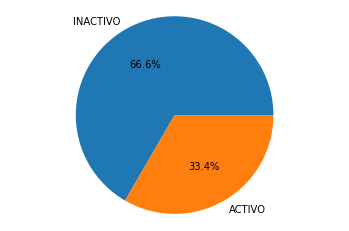

In [67]:
fig1, ax1 = plt.subplots()

ax1.pie(tab3['counts'], 
        labels=tab3['label'],autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

 1. ¿Qué?

Basados en el Framework de Tamara, para esta primera visualización lo que se quiere representar es el estado de la noticia criminal al momento de la consulta del dato en el sistema de información,se encuentra evidenciado con un  Dataset de atributos categóricos, representados por un porcentaje.

2. ¿Porque?

Se quiere mirar el comportamiento y la proporción que tiene el estado de la noticia, donde se descubre y se analiza que tantos procesos estan siendo revisados y que tantos no. Además, se identifican ciertas características y se pueden comparar con más cosas. Esta definida por forma.

3. ¿Cómo?

La visualización cuenta con una gráfica sencilla que compara dos categorias activo e inactivo, se hace por medio de un gráfico de torta y utiliza el canal de color.

Los pasos de esta visualización fueron Codificar -> Analizar -> Filtrar -> Gráficar.

##### ***Marcas y Canales***

Se útilizo la marca de área, y los canales de color para cada atributo, volumen y 

In [68]:
tab4 = Base1['ETAPA'].value_counts().rename_axis('label').reset_index(name='counts')
tab4

,label,counts
0,INDAGACIÓN,1189954
1,QUERELLABLE,341403
2,EJECUCIÓN DE PENAS,226400
3,JUICIO,197500
4,INVESTIGACIÓN,82294
5,TERMINACIÓN ANTICIPADA,8169
6,ETAPA DE INVESTIGACION PRELIMINAR,1243
7,ETAPA DE INSTRUCCION,172


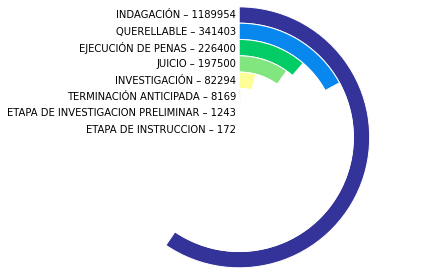

In [76]:
labels = tab4['label']
data = tab4['counts']
#number of data points
n = len(data)
#find max value for full ring
k = 10 ** int(log10(max(data)))
m = k * (1 + max(data) // k)


#radius of donut chart
r = 1.5
#calculate width of each ring
w = r / n 


#create colors along a chosen colormap
colors = [cm.terrain(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], 
                           data[i]], 
                          radius = r - i * w, 
                          startangle = 90, 
                          labels = ["", labels[i]], 
                          labeldistance = 1 - 1 / (1.5 * (n - i)), 
                          textprops = {"alpha": 0}, 
                          colors = ["white", colors[i]])
    plt.setp(innerring, 
             width = w, 
             edgecolor = "white")
    radius = r - i * w
    plt.text(0, radius - w / 2, f'{labels[i]} – {data[i]} ', ha='right', va='center')
    

plt.show()

<AxesSubplot:xlabel='ANIO_DENUNCIA', ylabel='TOTAL_PROCESOS'>

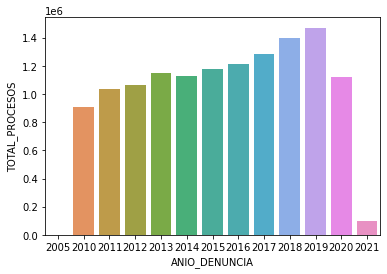

In [77]:
sns.barplot(data = Base1,
            estimator = sum,
            x = "ANIO_DENUNCIA", 
            y = "TOTAL_PROCESOS",
            ci = None)

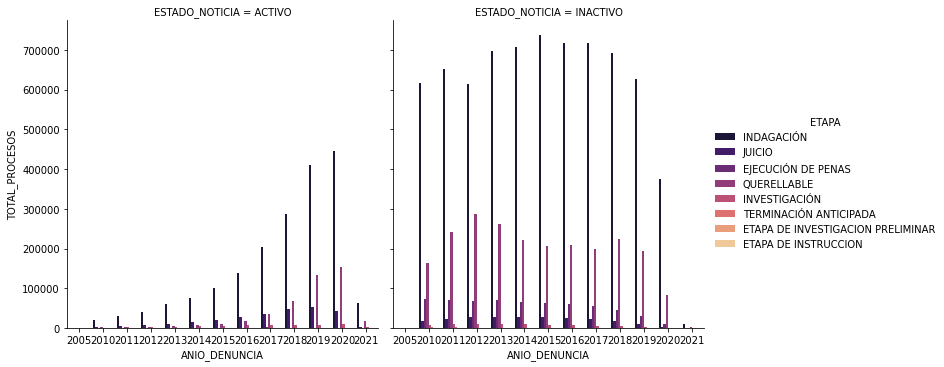

In [79]:
sns.catplot(data = Base1,
            kind = "bar",
            estimator = sum,
            x = "ANIO_DENUNCIA", 
            y = "TOTAL_PROCESOS",
            hue = "ETAPA",
            col = "ESTADO_NOTICIA",
            palette = 'magma',
            ci = None)

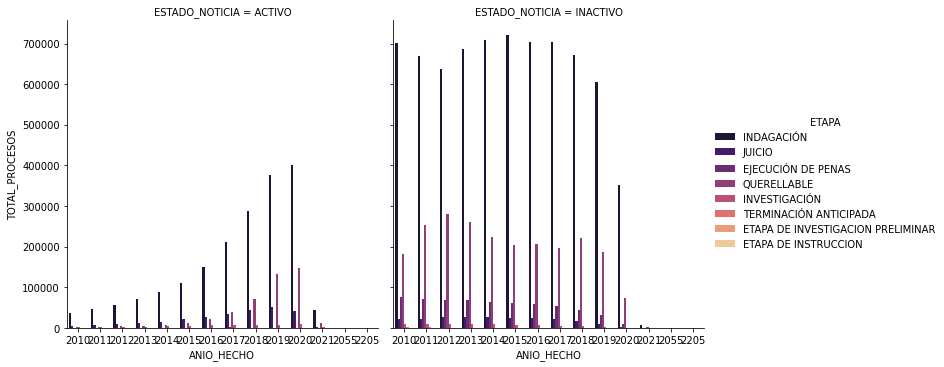

In [84]:
sns.catplot(data = Base1,
            kind = "bar",
            estimator = sum,
            x = "ANIO_HECHO", 
            y = "TOTAL_PROCESOS",
            hue = "ETAPA",
            col = "ESTADO_NOTICIA",
            palette = 'magma',
            ci = None)

In [36]:
tab4 = Base1['MUNICIPIO'].value_counts().rename_axis('label').reset_index(name='counts')
tab4

,label,counts
0,"BOGOTÁ, D.C.",92706
1,MEDELLÍN,51245
2,CALI,42089
3,BARRANQUILLA,26874
4,BUCARAMANGA,26347
...,...,...
1036,UBATÉ,14
1037,PAPUNAUA,11
1038,MORICHAL,8
1039,PANA PANA,5


In [26]:
Base1['TOTAL_PROCESOS'].describe()

count    924854.000000
mean          5.375095
std          49.012042
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        8078.000000
Name: TOTAL_PROCESOS, dtype: float64

In [59]:
Base1["ESTADO_NOTICIA"].value_counts()

INACTIVO    617825
ACTIVO      307029
Name: ESTADO_NOTICIA, dtype: int64

In [28]:
Base1["DELITO"].value_counts()

INASISTENCIA ALIMENTARIA ART. 233 C.P.                                                                              42006
TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES ART. 376 C..                                                         38229
LESIONES ART. 111 C.P.                                                                                              35540
HOMICIDIO ART. 103 C.P.                                                                                             35524
VIOLENCIA INTRAFAMILIAR ART. 229 C.P.                                                                               30801
                                                                                                                    ...  
ACTOS CONTRARIOS A LA DEFENSA DE LA NACION ART. 460 C.P.                                                                1
MANIPULACION FRAUDULENTA DE ESPECIES INSCRITAS EN EL REGISTRO NACIONAL DE VALORES E INTERMEDIARIOS ART. 317 C.P.        1
DESTINACION ILEGAL DE CO

In [27]:
#Tabla de estado de la noticia con delito para el dep de magdalena 
tab1 = pd.crosstab(df_SECOP_mun["ESTADO_NOTICIA"],df_SECOP_mun["DELITO"])
tab1

DELITO,ABANDONO ART 128 C.P. SEGUIDO DE LESIONES PERSONALES ART 130,ABANDONO ART. 127 C.P.,ABIGEATO ART. 243 C.P.,ABIGEATO ART. 243A C.P. AGRAVADO,ABORTO ART. 122 C.P.,ABORTO SIN CONSENTIMIENTO ART. 123 C.P.,ABUSO DE AUTORIDAD POR ACTO ARBITRARIO O INJUSTO ART. 416,ABUSO DE AUTORIDAD POR OMISION DE DENUNCIA ART. 417 C.P. INCISO 1,ABUSO DE AUTORIDAD POR OMISION DE DENUNCIA ART. 417 C.P. INCISO 2. AGRAVADO POR DELITO DE OMISION DE PARTICULAR,ABUSO DE CONDICIONES DE INFERIORIDAD. ART. 251 C.P.,...,VIOLACION DE HABITACION AJENA POR SERVIDOR PUBLICO ART. 190 C.P. POR VIOLACION DE LUGAR DE TRABAJO ART. 191 C.P.,VIOLACION DE HABITACION AJENA. ART. 189 C.P.,VIOLACION DE LA LIBERTAD DE TRABAJO. ART. 198 C.P.,VIOLACION DE LOS DERECHOS DE REUNION Y ASOCIACION. ART. 200 C.P.,VIOLACION DE MEDIDAS SANITARIAS ART. 368 C.P.,VIOLACION ILICITA DE COMUNICACIONES O CORRESPONDENCIA DE CARACTER OFICIAL. ART. 196 C.P.,VIOLACION ILICITA DE COMUNICACIONES. ART. 192 C.P.,VIOLENCIA CONTRA SERVIDOR PUBLICO ART. 429 C.P.,VIOLENCIA INTRAFAMILIAR ART. 229 C.P.,VOTO FRAUDULENTO ART. 391 C.P
ESTADO_NOTICIA,,,,,,,,,,,,,,,,,,,,,
ACTIVO,8,5,19,6,19,2,72,6,8,4,...,0,27,3,0,11,3,1,93,275,4
INACTIVO,18,6,12,0,12,2,77,7,6,3,...,2,66,4,6,2,0,6,73,299,15


In [ ]:
tab2 = pd.crosstab(Base1["DEPARTAMENTO"],Base1["ESTADO_NOTICIA"])
tab2

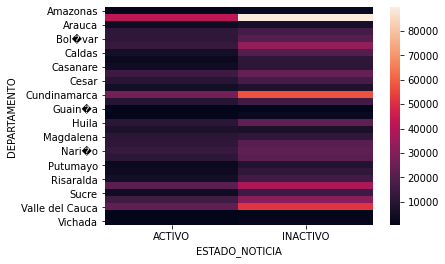

In [57]:
ax2 = sns.heatmap(tab2)

In [61]:
tab3 = pd.crosstab(Base1["DEPARTAMENTO"],Base1["DELITO"])
tab3

DELITO,ABANDONO ART 128 C.P. SEGUIDO DE LESIONES PERSONALES ART 130,ABANDONO ART. 127 C.P.,ABANDONO ART. 127 C.P. AGRAVADO POR LUGAR DESPOBLADO O SOLITARIO,ABANDONO ART. 127 C.P. SEGUIDO DE LESIONES PERSONALES ART. 130 C.P.,ABANDONO DE HIJO FRUTO DE ACCESO CARNAL VIOLENTO ABUSIVO O DE INSEMINACION ARTIFICIAL O TRANSFERENCIA DE OVULO FECUNDADO NO CONSENTIDAS ART. 128 C.P.,ABIGEATO ART. 243 C.P.,ABIGEATO ART. 243A C.P. AGRAVADO,ABORTO ART. 122 C.P.,ABORTO FORZADO EN PERSONA PROTEGIDA ART. 139E,ABORTO SIN CONSENTIMIENTO ART. 123 C.P.,...,VIOLACION DE LA RESERVA INDUSTRIAL O COMERCIAL ART. 308 C.P.,VIOLACION DE LA RESERVA INDUSTRIAL O COMERCIAL ART. 308 C.P. INCISO 2,VIOLACION DE LOS DERECHOS DE REUNION Y ASOCIACION. ART. 200 C.P.,VIOLACION DE LOS TOPES O LIMITES DE GASTOS EN LAS CAMPA�AS ELECTORALES ART. 369B,VIOLACION DE MEDIDAS SANITARIAS ART. 368 C.P.,VIOLACION ILICITA DE COMUNICACIONES O CORRESPONDENCIA DE CARACTER OFICIAL. ART. 196 C.P.,VIOLACION ILICITA DE COMUNICACIONES. ART. 192 C.P.,VIOLENCIA CONTRA SERVIDOR PUBLICO ART. 429 C.P.,VIOLENCIA INTRAFAMILIAR ART. 229 C.P.,VOTO FRAUDULENTO ART. 391 C.P
DEPARTAMENTO,,,,,,,,,,,,,,,,,,,,,
Amazonas,2,12,0,0,0,0,0,7,0,2,...,0,0,4,0,3,0,2,45,108,1
Antioquia,192,157,6,0,0,14,3,66,0,16,...,13,2,72,0,107,11,57,1479,4625,37
Arauca,9,3,0,0,0,12,3,9,0,4,...,0,0,1,0,9,0,1,74,292,4
Atl�ntico,51,22,0,0,0,24,0,49,0,2,...,1,0,42,0,28,4,12,192,699,17
Bol�var,33,28,1,0,1,42,6,50,0,5,...,1,0,28,0,43,3,8,238,827,26
Boyaca,39,68,2,2,0,19,3,85,0,2,...,1,0,16,1,41,3,11,426,2270,19
Caldas,24,18,1,0,0,4,0,47,0,2,...,0,0,22,0,37,0,4,310,889,5
Caquet�,9,3,0,0,0,5,1,12,0,1,...,0,0,3,0,25,1,4,112,385,6
Casanare,9,18,1,0,0,54,15,30,0,1,...,1,1,1,0,15,0,2,129,649,2


<AxesSubplot:xlabel='TOTAL_PROCESOS', ylabel='DEPARTAMENTO'>

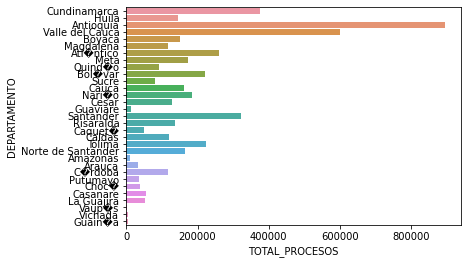

In [68]:
sns.barplot(data = Base1,
            estimator = sum,
            x = "TOTAL_PROCESOS", 
            y = "DEPARTAMENTO",
            ci = None)